In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
import nbimporter
from preprocessamento import gerar_target

Importing Jupyter notebook from preprocessamento.ipynb


In [2]:
data_2016 = pd.read_csv('respostas_2016.csv')

In [3]:
from preprocessamento import preprocessar

In [4]:
dados_2016 = preprocessar(data_2016)

In [5]:
dados_2016.shape

(237, 29)

In [6]:
target = gerar_target(data_2016)

In [7]:
forest = ExtraTreesClassifier()

In [8]:
from sklearn.model_selection import cross_val_score

- gini importance
https://www.youtube.com/watch?v=Zze7SKuz9QQ&t=334s

- verificar se arvore de decisão original se ela tem gini importance

- metodos de seleção de atributos sci-kit

In [9]:
forest.fit(dados_2016, target)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [10]:
importances = forest.feature_importances_

In [11]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

In [12]:
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 25 (0.053346)
2. feature 26 (0.050420)
3. feature 22 (0.050146)
4. feature 3 (0.049717)
5. feature 28 (0.048734)
6. feature 11 (0.046083)
7. feature 17 (0.045778)
8. feature 18 (0.045531)
9. feature 21 (0.044680)
10. feature 16 (0.044249)
11. feature 24 (0.043157)
12. feature 10 (0.041918)
13. feature 15 (0.041355)
14. feature 9 (0.041192)
15. feature 20 (0.040651)
16. feature 23 (0.039998)
17. feature 19 (0.039796)
18. feature 14 (0.039607)
19. feature 6 (0.037226)
20. feature 2 (0.036974)
21. feature 27 (0.029766)
22. feature 0 (0.028861)
23. feature 12 (0.016228)
24. feature 7 (0.014307)
25. feature 4 (0.013118)
26. feature 8 (0.007979)
27. feature 5 (0.005678)
28. feature 1 (0.003505)
29. feature 13 (0.000000)


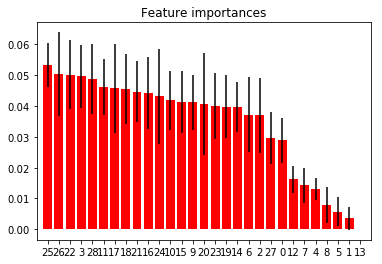

In [13]:
print("Feature ranking:")

for f in range(dados_2016.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(dados_2016.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(dados_2016.shape[1]), indices)
plt.xlim([-1, dados_2016.shape[1]])
plt.show()
